<a href="https://colab.research.google.com/github/vini1lol/DataScience/blob/master/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Covid-19


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Pegando os dados (dados retirados de https://www.kaggle.com/unanimad/corona-virus-brazil#brazil_covid19.csv)

In [2]:
dados2 = pd.read_csv("/content/drive/My Drive/Meus testes de dados/brazil_covid19.csv")
dados2

,date,region,state,cases,deaths
0,2020-01-30,Centro-Oeste,Distrito Federal,0,0
1,2020-01-30,Centro-Oeste,Goiás,0,0
2,2020-01-30,Centro-Oeste,Mato Grosso,0,0
3,2020-01-30,Centro-Oeste,Mato Grosso do Sul,0,0
4,2020-01-30,Nordeste,Alagoas,0,0
...,...,...,...,...,...
2479,2020-04-30,Sudeste,Rio de Janeiro,9453,854
2480,2020-04-30,Sudeste,São Paulo,28698,2375
2481,2020-04-30,Sul,Paraná,1407,83
2482,2020-04-30,Sul,Rio Grande do Sul,1466,51


In [3]:
dadosLimpo = (dados2['cases']==0) & (dados2['deaths']==0)
dadosLimpo = dados2[~dadosLimpo]
dadosLimpo

,date,region,state,cases,deaths
752,2020-02-26,Sudeste,São Paulo,1,0
779,2020-02-27,Sudeste,São Paulo,1,0
806,2020-02-28,Sudeste,São Paulo,1,0
833,2020-02-29,Sudeste,São Paulo,2,0
860,2020-03-01,Sudeste,São Paulo,2,0
...,...,...,...,...,...
2479,2020-04-30,Sudeste,Rio de Janeiro,9453,854
2480,2020-04-30,Sudeste,São Paulo,28698,2375
2481,2020-04-30,Sul,Paraná,1407,83
2482,2020-04-30,Sul,Rio Grande do Sul,1466,51


In [4]:
dadosLimpo.index = range(dadosLimpo.shape[0])
dadosLimpo.to_csv("/content/drive/My Drive/Meus testes de dados/dados.csv")
dadosLimpo

,date,region,state,cases,deaths
0,2020-02-26,Sudeste,São Paulo,1,0
1,2020-02-27,Sudeste,São Paulo,1,0
2,2020-02-28,Sudeste,São Paulo,1,0
3,2020-02-29,Sudeste,São Paulo,2,0
4,2020-03-01,Sudeste,São Paulo,2,0
...,...,...,...,...,...
1297,2020-04-30,Sudeste,Rio de Janeiro,9453,854
1298,2020-04-30,Sudeste,São Paulo,28698,2375
1299,2020-04-30,Sul,Paraná,1407,83
1300,2020-04-30,Sul,Rio Grande do Sul,1466,51


## Dados por estado

In [5]:
d =dadosLimpo['state'].unique()
d

array(['São Paulo', 'Rio de Janeiro', 'Bahia', 'Espírito Santo',
       'Distrito Federal', 'Alagoas', 'Minas Gerais', 'Rio Grande do Sul',
       'Pernambuco', 'Paraná', 'Goiás', 'Rio Grande do Norte',
       'Santa Catarina', 'Sergipe', 'Amazonas', 'Mato Grosso do Sul',
       'Ceará', 'Paraíba', 'Acre', 'Pará', 'Tocantins', 'Mato Grosso',
       'Piauí', 'Amapá', 'Rondônia', 'Maranhão', 'Roraima'], dtype=object)

In [6]:
estado ={}
casos = 0
mortes = 0
for i in range(len(d)):
  aux = dadosLimpo['state'] == d[i]
  aux = dadosLimpo[aux]
  aux.index = range(aux.shape[0])
  for k in range(aux.shape[0]):
    if aux['cases'][k] > 0:
      casos = aux['cases'][k]
  for k in range(aux.shape[0]):
    if aux['deaths'][k] > 0:
      mortes = aux['deaths'][k]
  estado.update( {d[i]:{"casos":casos,"mortes":mortes}})
estado

{'Acre': {'casos': 404, 'mortes': 19},
 'Alagoas': {'casos': 1044, 'mortes': 47},
 'Amapá': {'casos': 1080, 'mortes': 34},
 'Amazonas': {'casos': 5254, 'mortes': 425},
 'Bahia': {'casos': 2851, 'mortes': 104},
 'Ceará': {'casos': 7606, 'mortes': 482},
 'Distrito Federal': {'casos': 1356, 'mortes': 30},
 'Espírito Santo': {'casos': 2465, 'mortes': 83},
 'Goiás': {'casos': 781, 'mortes': 29},
 'Maranhão': {'casos': 3190, 'mortes': 184},
 'Mato Grosso': {'casos': 297, 'mortes': 11},
 'Mato Grosso do Sul': {'casos': 255, 'mortes': 9},
 'Minas Gerais': {'casos': 1827, 'mortes': 82},
 'Paraná': {'casos': 1407, 'mortes': 83},
 'Paraíba': {'casos': 814, 'mortes': 62},
 'Pará': {'casos': 2876, 'mortes': 208},
 'Pernambuco': {'casos': 6876, 'mortes': 565},
 'Piauí': {'casos': 513, 'mortes': 24},
 'Rio Grande do Norte': {'casos': 1177, 'mortes': 56},
 'Rio Grande do Sul': {'casos': 1466, 'mortes': 51},
 'Rio de Janeiro': {'casos': 9453, 'mortes': 854},
 'Rondônia': {'casos': 502, 'mortes': 16},
 

In [7]:
df_estado = pd.DataFrame(estado)
df_estado=df_estado.transpose()
df_estado.reset_index(level=0,inplace= True)
df_estado.rename(columns={'index':'estado'}, inplace=True)
df_estado.head()

,estado,casos,mortes
0,São Paulo,28698,2375
1,Rio de Janeiro,9453,854
2,Bahia,2851,104
3,Espírito Santo,2465,83
4,Distrito Federal,1356,30


### Casos e mortes por estado

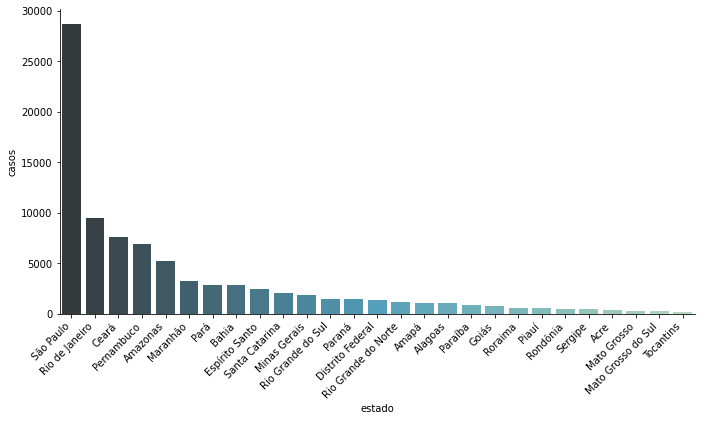

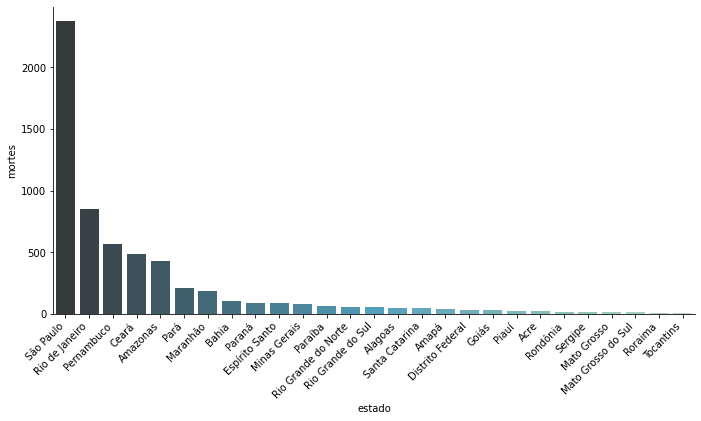

In [8]:
df_estado.sort_values(by=['casos'], inplace= True, ascending= False)
g = sns.catplot(x='estado',y='casos',data=df_estado, kind="bar",
            palette="GnBu_d", aspect = 2)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
print(g)
df_estado.sort_values(by=['mortes'], inplace= True, ascending= False)
h = sns.catplot(x='estado',y='mortes',data=df_estado, kind="bar",
            palette="GnBu_d", aspect = 2)
for ax in h.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
print(h)
            

## Dados do Brasil

In [9]:
df_Brasil = dados2[['date','state','cases','deaths']]
df_Brasil.head()

,date,state,cases,deaths
0,2020-01-30,Distrito Federal,0,0
1,2020-01-30,Goiás,0,0
2,2020-01-30,Mato Grosso,0,0
3,2020-01-30,Mato Grosso do Sul,0,0
4,2020-01-30,Alagoas,0,0


In [10]:
selecao = (df_Brasil['cases'] == 0) & (df_Brasil['deaths'] == 0)
df_Brasil = df_Brasil[~selecao]
df_Brasil.index= range(df_Brasil.shape[0])
df_Brasil

,date,state,cases,deaths
0,2020-02-26,São Paulo,1,0
1,2020-02-27,São Paulo,1,0
2,2020-02-28,São Paulo,1,0
3,2020-02-29,São Paulo,2,0
4,2020-03-01,São Paulo,2,0
...,...,...,...,...
1297,2020-04-30,Rio de Janeiro,9453,854
1298,2020-04-30,São Paulo,28698,2375
1299,2020-04-30,Paraná,1407,83
1300,2020-04-30,Rio Grande do Sul,1466,51


In [11]:
data = df_Brasil['date'].unique()
data

array(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
       '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08',
       '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16',
       '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20',
       '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24',
       '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28',
       '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05',
       '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09',
       '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13',
       '2020-04-14', '2020-04-15', '2020-04-16', '2020-04-17',
       '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
       '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
       '2020-04-26', '2020-04-27', '2020-04-28', '2020-

In [12]:
df_Bdata={}
s=0
for i in range(len(data)):
  s=0
  for j in range(df_Brasil.shape[0]):
    if data[i] == df_Brasil['date'][j]:
      s+= df_Brasil['cases'][j]
      df_Bdata.update({data[i]:s})
df_Bdata = pd.DataFrame(df_Bdata,index=['casos'])
df_Bdata = df_Bdata.transpose()
df_Bdata.reset_index(level=0,inplace=True)
df_Bdata.rename(columns={'index':'data'},inplace=True)
df_Bdata.head(10)

,data,casos
0,2020-02-26,1
1,2020-02-27,1
2,2020-02-28,1
3,2020-02-29,2
4,2020-03-01,2
5,2020-03-02,2
6,2020-03-03,2
7,2020-03-04,3
8,2020-03-05,7
9,2020-03-06,13


## Quantidade de casos atual no Brasil

data: 2020-04-30, casos: 85380
Diferença do dia anterior 7218


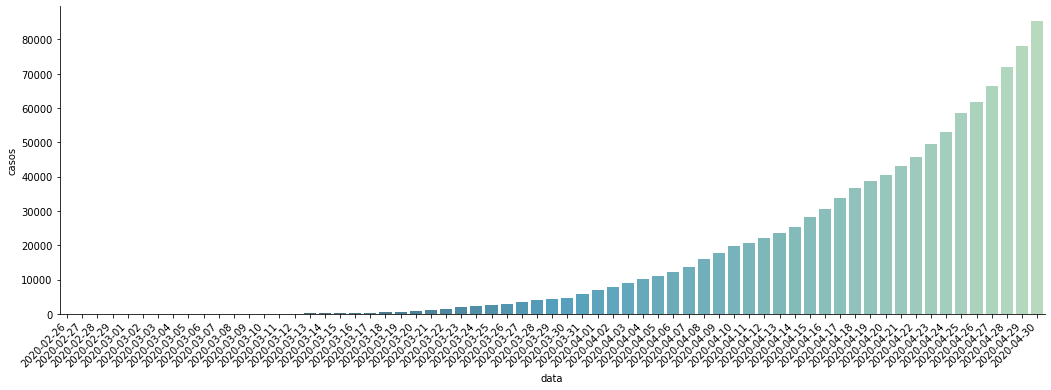

In [13]:
j = sns.catplot(x='data',y='casos',data=df_Bdata, kind="bar",
            palette="GnBu_d", aspect = 3)
for ax in j.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
print(j)
print('data: {}, casos: {}'.format(df_Bdata['data'][len(data)-1], df_Bdata['casos'][len(data)-1]))
print('Diferença do dia anterior {}'.format(df_Bdata['casos'][len(data)-1]-df_Bdata['casos'][len(data)-2]))

# Regressão Linear

## Importando train_test_split

In [0]:
from sklearn.model_selection import train_test_split

##Criando uma Serie pandas para armazenar os casos(y)

In [0]:
 y = df_Bdata['casos']

## Criando uma Serie pandas para armazenar o numero de dias(x)

In [0]:
X = range(1,len(df_Bdata['casos'])+1)
X = pd.Series(X)

## Criando os datasets de treino e de teste

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=40)
X_train = np.array(X_train)
X_train = X_train.reshape(-1,1)
X_test = np.array(X_test)
X_test = X_test.reshape(-1,1)

##Importando LinearRegression e metrics da biblioteca scikit-learn

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

##Instanciando a classe LinearRegression()

In [0]:
modelo = LinearRegression()

##Utilizando o método fit() do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (X_train e y_train)

In [20]:
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

In [21]:
print("R² ={}".format(modelo.score(X_train,y_train).round(2)))

R² =0.76


##Gerando previsões para os dados de TESTE (X_test) utilizando o método predict() do objeto "modelo"

In [0]:
y_previsto = modelo.predict(X_test)

##Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

In [23]:
print("R² = %s" % metrics.r2_score(y_test,y_previsto).round(2))

R² = 0.66


## Obtendo previções a partir do modelo

In [24]:
entrada = np.array([[60],[61],[70]])
entrada = entrada.reshape(-1,1)
modelo.predict(entrada).round(2)

array([45591.87, 46657.16, 56244.75])

#Computando os dados de mortes confirmadas

In [25]:
df_Bdatad={}
s=0
for i in range(len(data)):
  s=0
  for t in range(df_Brasil.shape[0]):
    if data[i] == df_Brasil['date'][t]:
      s+= df_Brasil['deaths'][t]
      df_Bdatad.update({data[i]:s})
df_Bdatad = pd.DataFrame(df_Bdatad,index=['deaths'])
df_Bdatad = df_Bdatad.transpose()
df_Bdatad.reset_index(level=0,inplace=True)
df_Bdatad.rename(columns={'index':'data'},inplace=True)
df_Bdatad.head(10)

,data,deaths
0,2020-02-26,0
1,2020-02-27,0
2,2020-02-28,0
3,2020-02-29,0
4,2020-03-01,0
5,2020-03-02,0
6,2020-03-03,0
7,2020-03-04,0
8,2020-03-05,0
9,2020-03-06,0


##Quantidade de mortes atual

data: 2020-04-30, mortes: 5901
Diferença do dia anterior 435


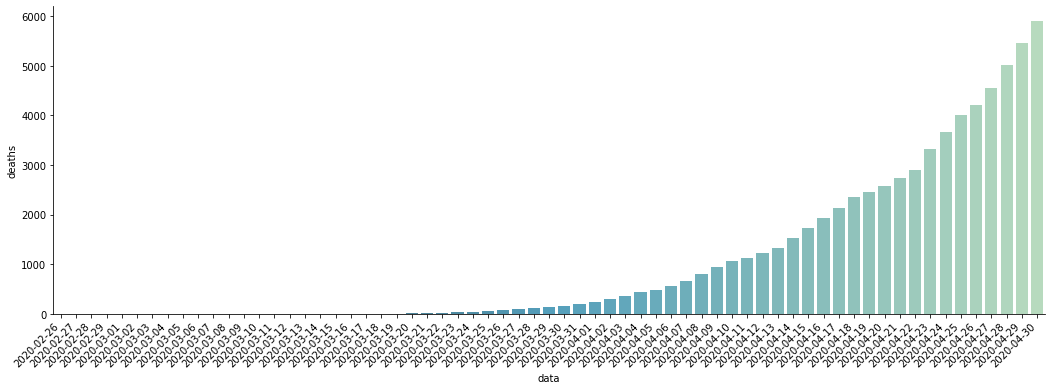

In [26]:
k = sns.catplot(x='data',y='deaths',data=df_Bdatad, kind="bar",
            palette="GnBu_d", aspect = 3)
for ax in k.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

print(k)
print('data: {}, mortes: {}'.format(df_Bdatad['data'][len(data)-1],df_Bdatad['deaths'][len(data)-1]))
print('Diferença do dia anterior {}'.format(df_Bdatad['deaths'][len(data)-1]-df_Bdatad['deaths'][len(data)-2]))

#Crescimento em cada estado

In [27]:
dadosPorEstado = {}
for i in range(len(d)):
  dadosPorEstado.update({d[i]:{}})
d[0]

'São Paulo'

In [28]:
for i in range(len(d)):
  dadosPorEstado[d[i]] = dadosLimpo[dadosLimpo['state'] == d[i]]
ddframe = dadosPorEstado
dadosPorEstado
frame = pd.DataFrame()
for i in range(len(d)):
  dd = pd.DataFrame(ddframe[d[i]])
  dd.index= range(dd.shape[0])
  frame = pd.concat([frame,dd])
frame.to_csv("/content/drive/My Drive/Meus testes de dados/dadosestado.csv")
frame

,date,region,state,cases,deaths
0,2020-02-26,Sudeste,São Paulo,1,0
1,2020-02-27,Sudeste,São Paulo,1,0
2,2020-02-28,Sudeste,São Paulo,1,0
3,2020-02-29,Sudeste,São Paulo,2,0
4,2020-03-01,Sudeste,São Paulo,2,0
...,...,...,...,...,...
35,2020-04-26,Norte,Roraima,401,4
36,2020-04-27,Norte,Roraima,407,4
37,2020-04-28,Norte,Roraima,425,6
38,2020-04-29,Norte,Roraima,452,6


## Numero Casos


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


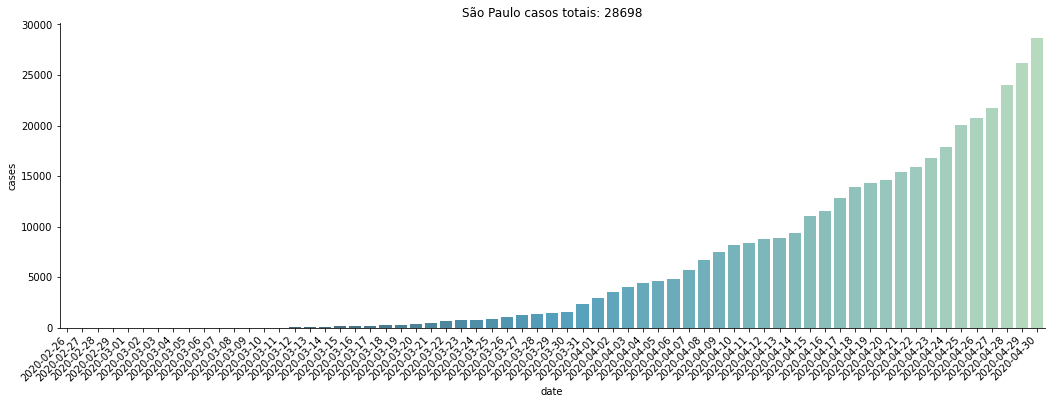

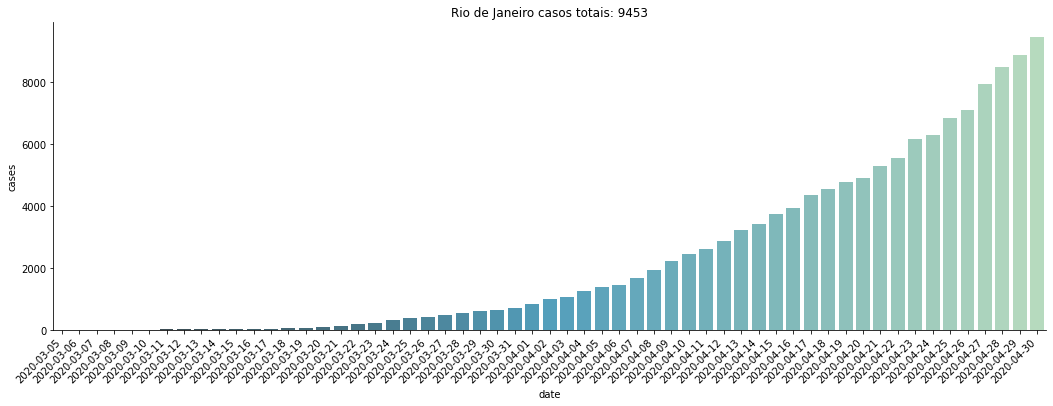

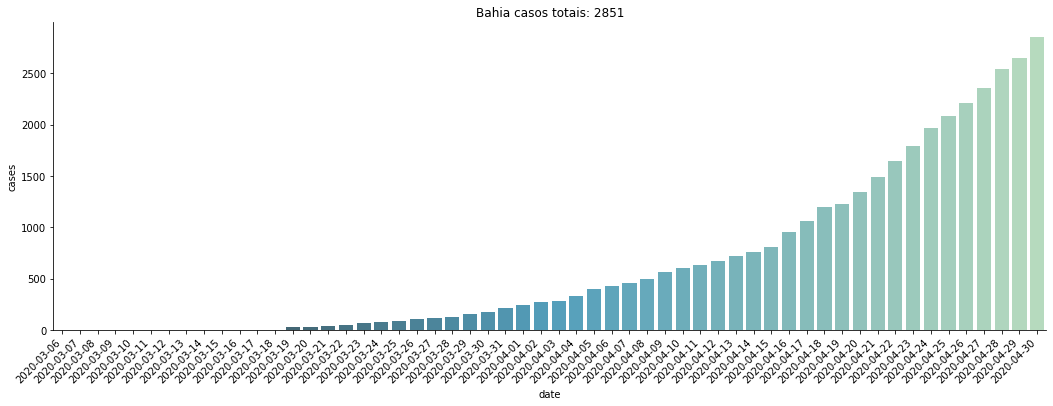

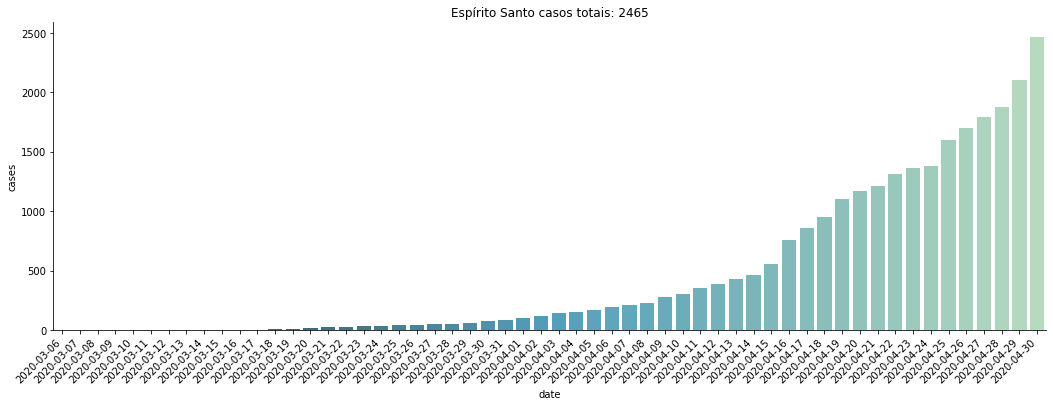

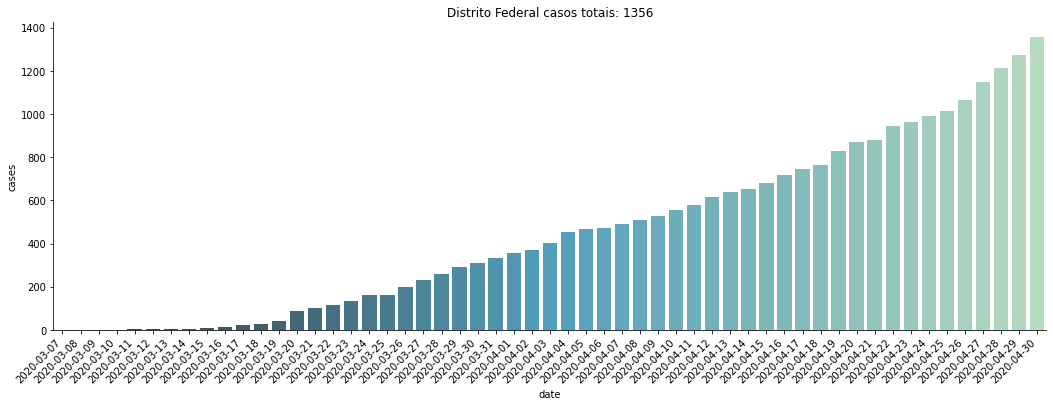

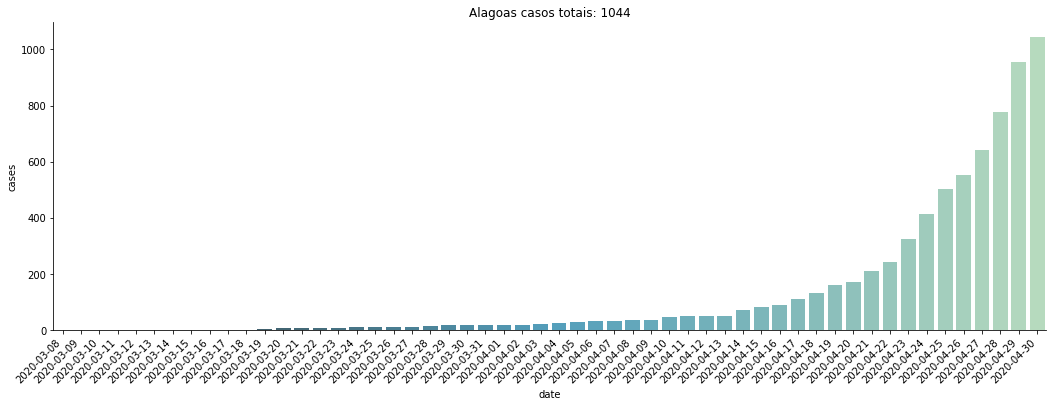

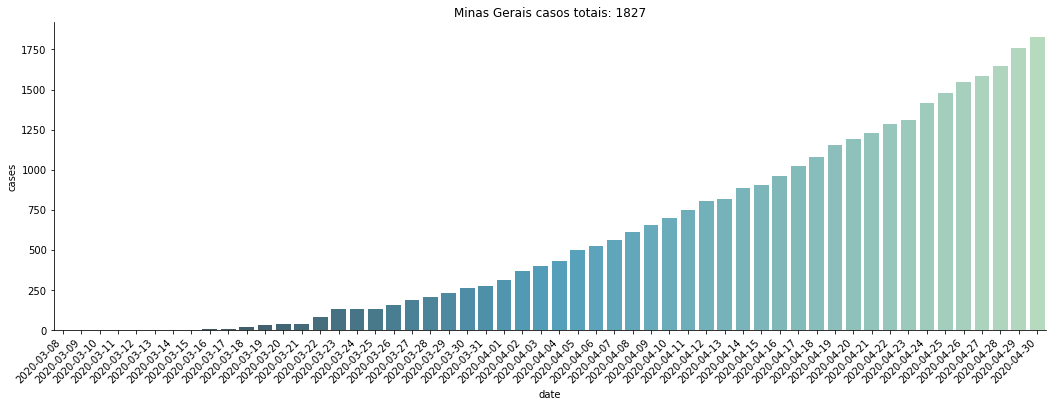

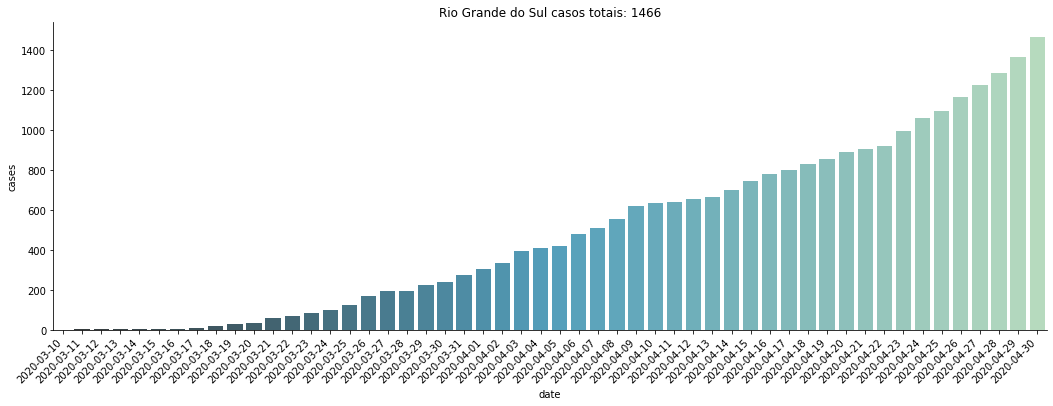

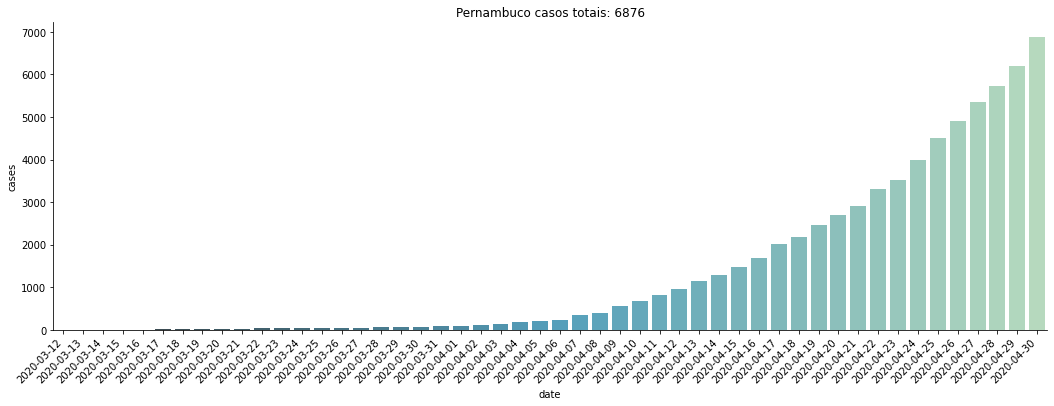

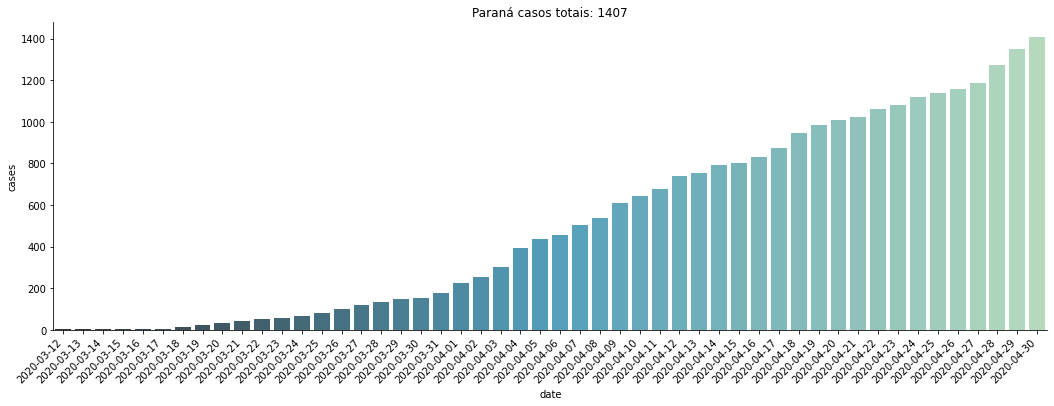

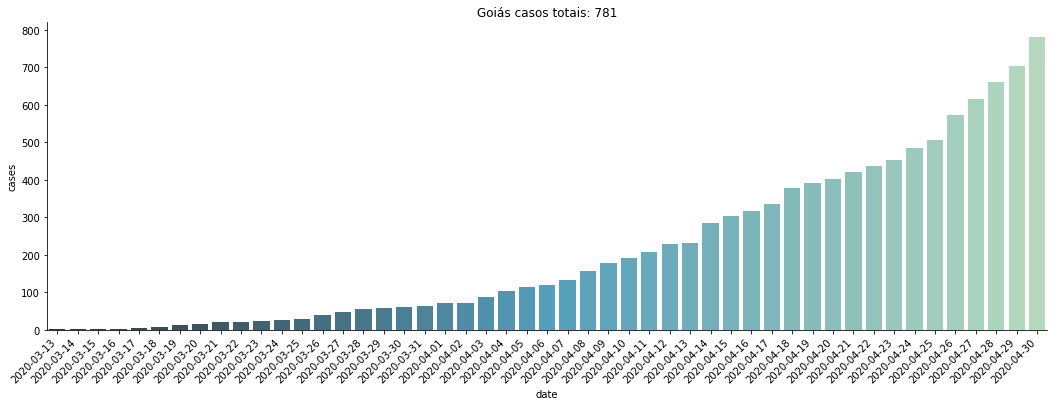

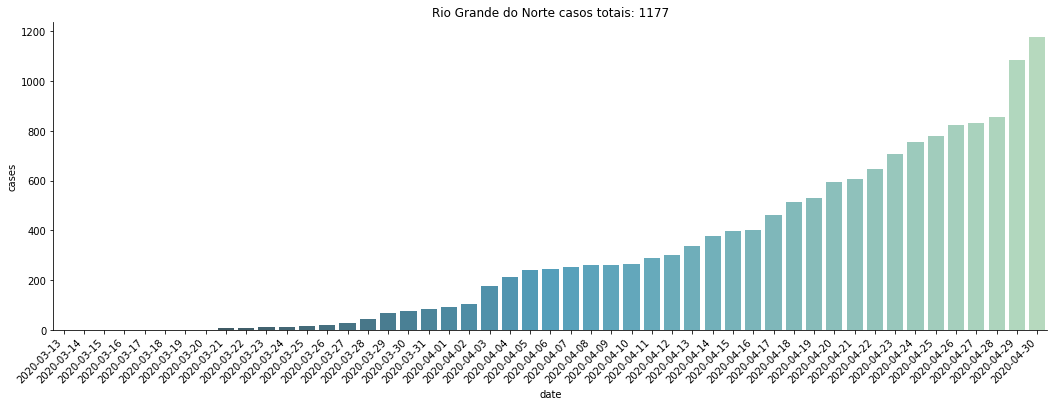

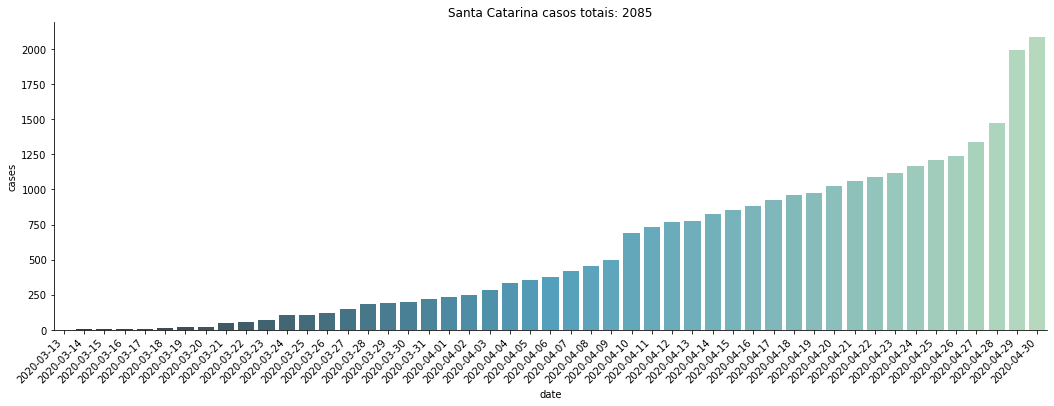

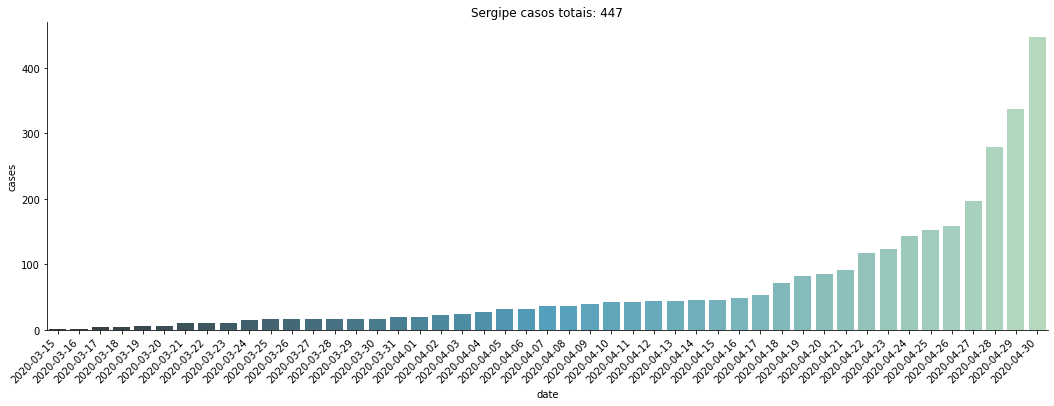

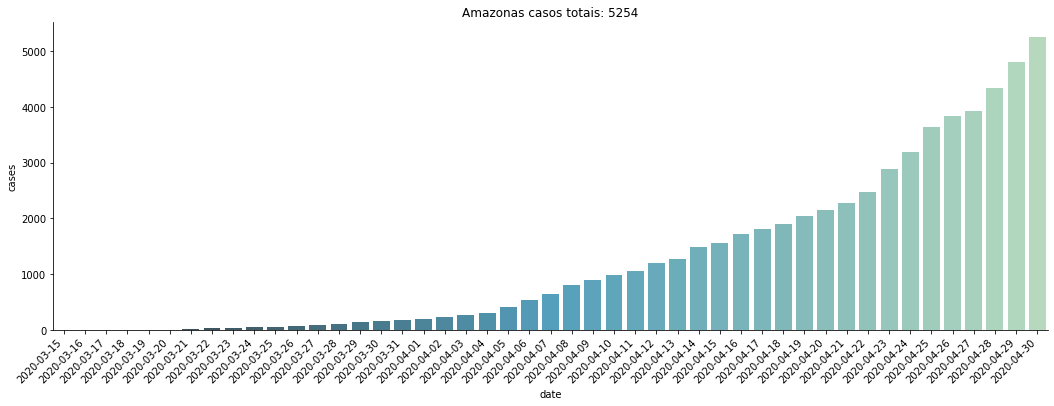

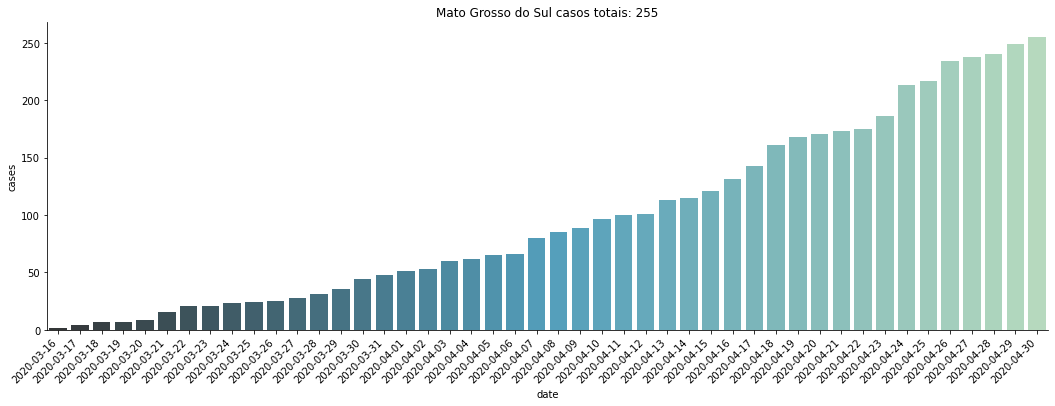

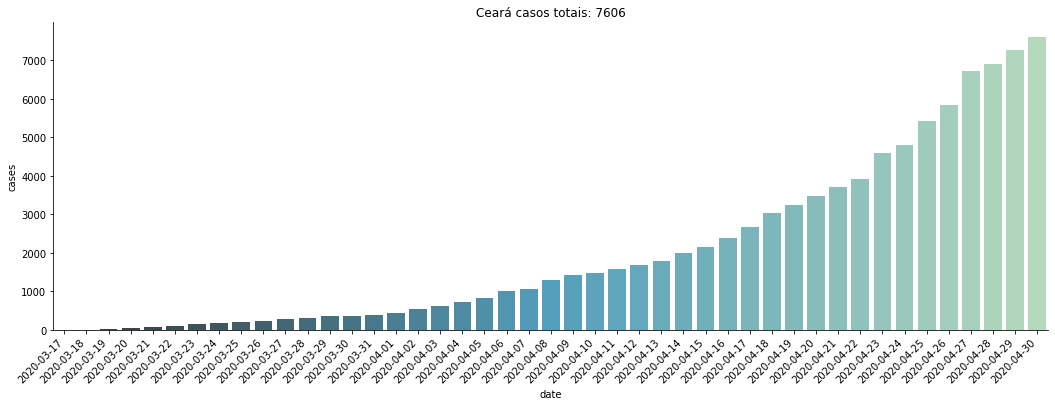

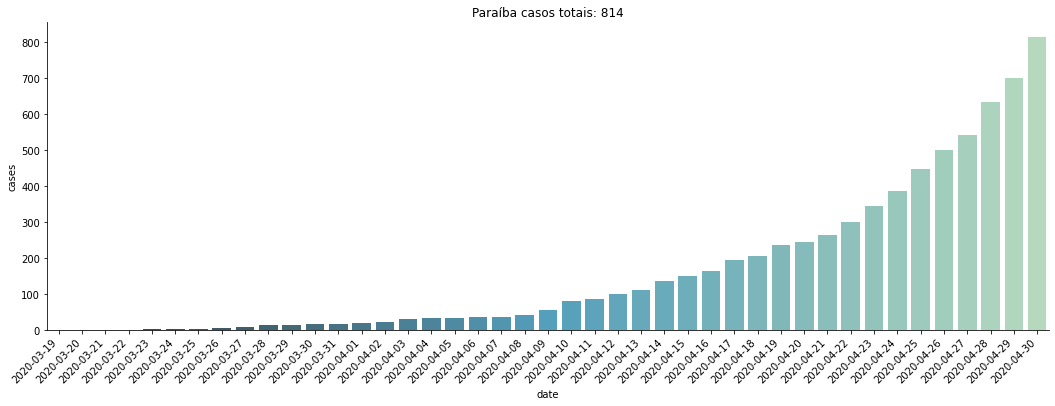

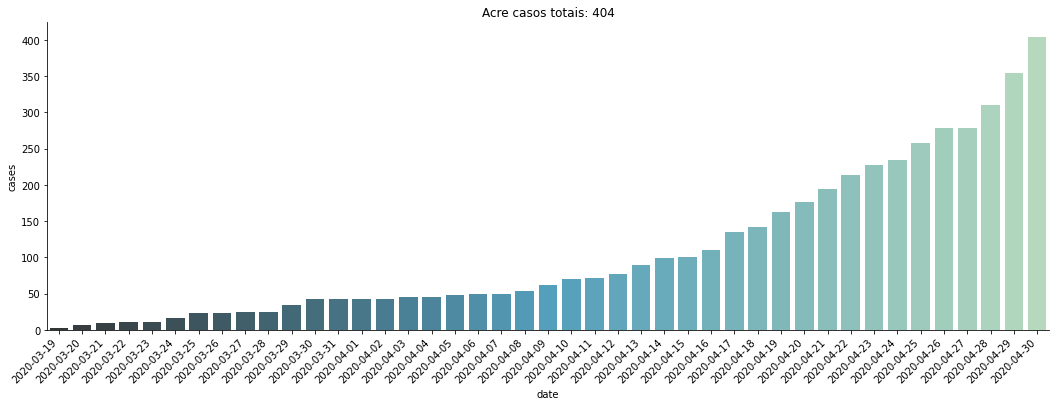

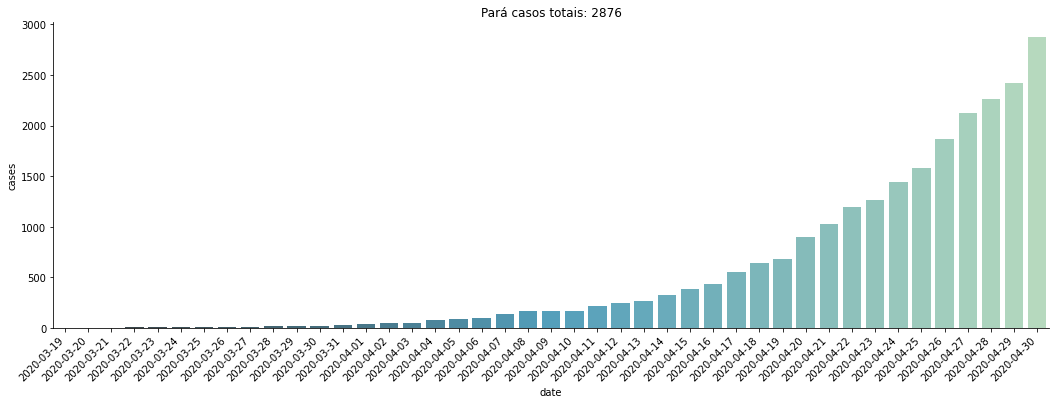

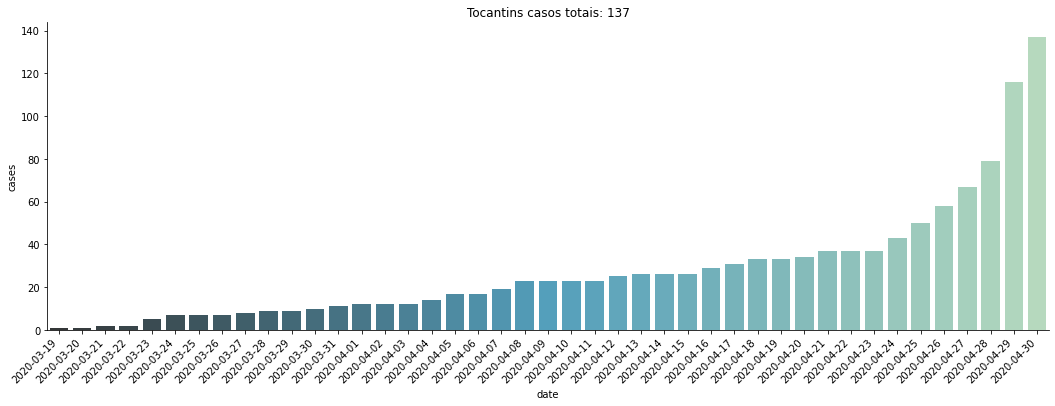

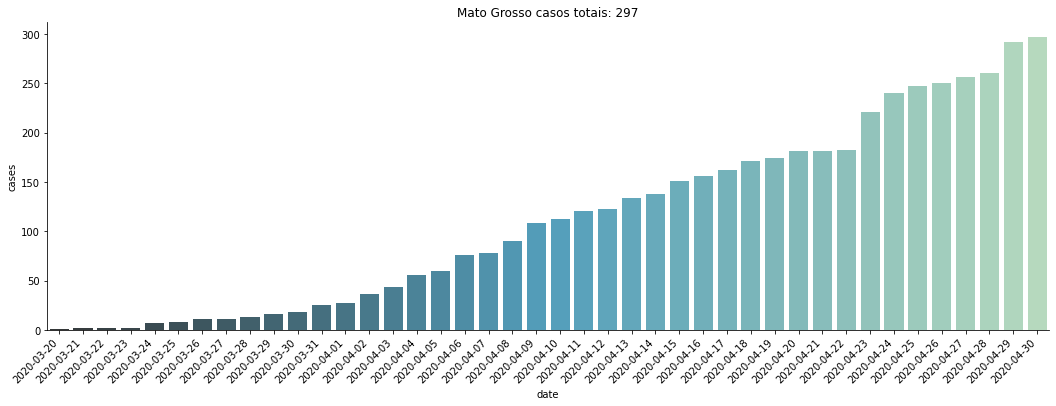

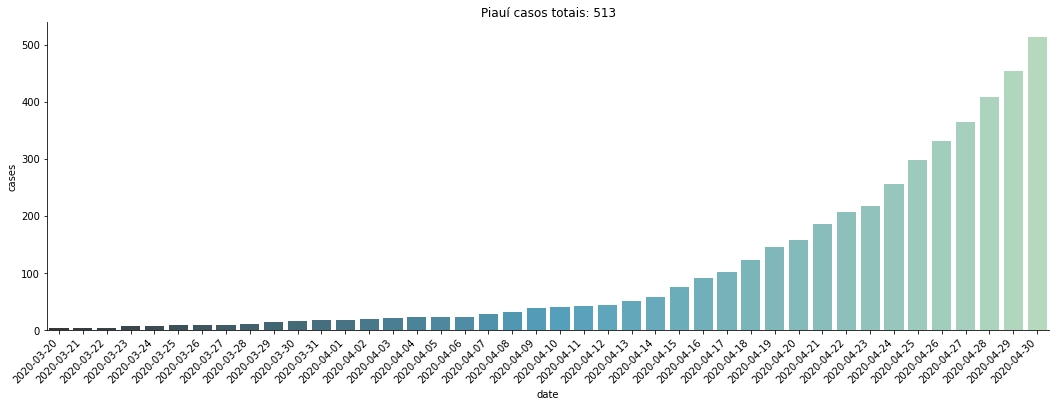

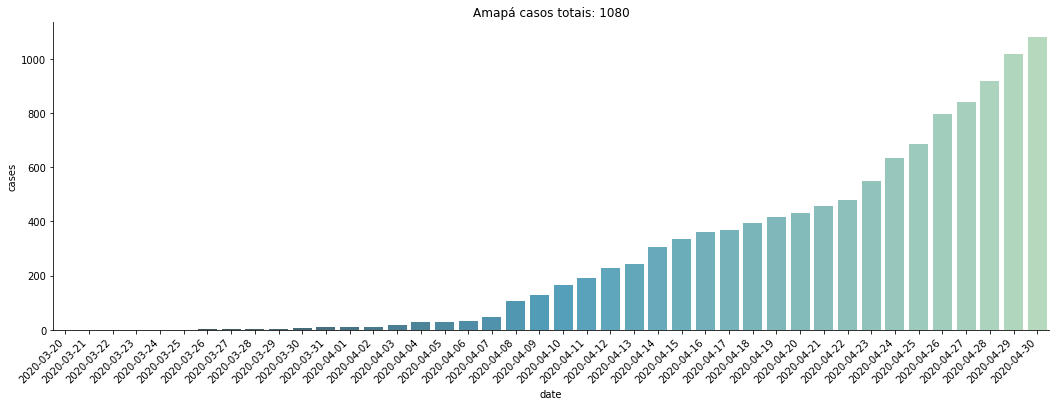

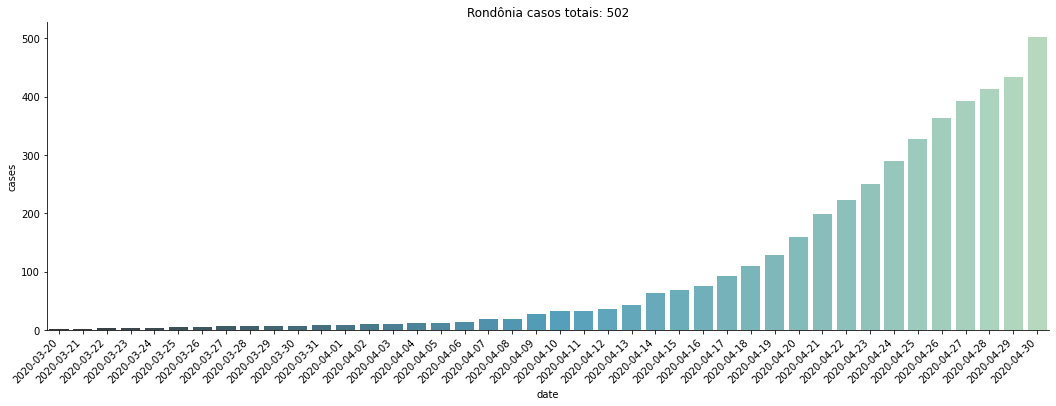

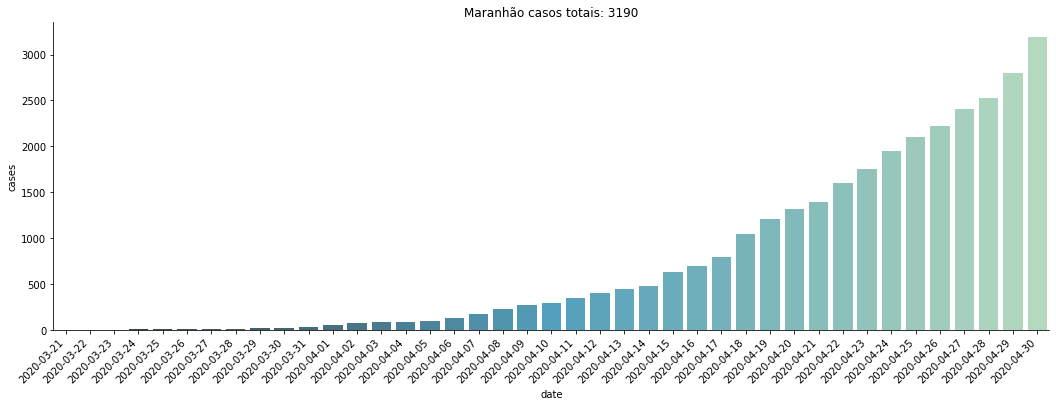

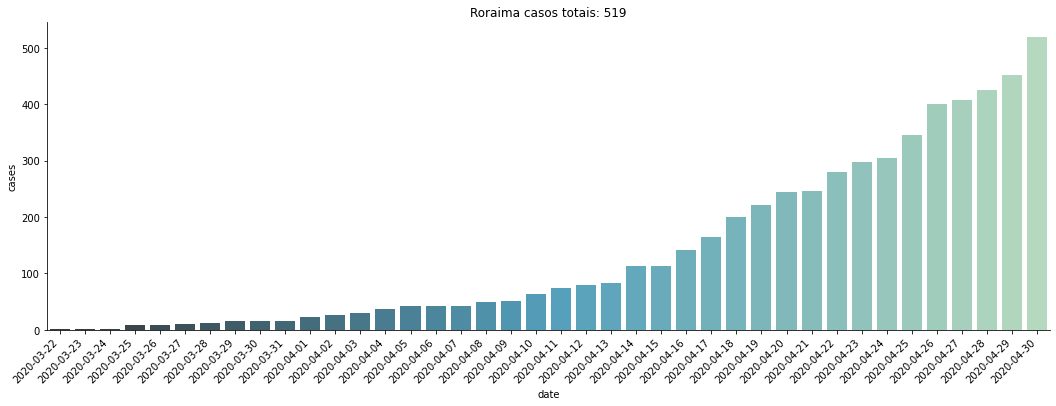

In [29]:
import matplotlib.pyplot as plt
for i in range(len(d)):
  p = sns.catplot(x='date',y='cases', data=dadosPorEstado[d[i]],
                  kind='bar',palette="GnBu_d",
                  aspect=3)
  for ax in p.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
  Casos_confimados = dadosPorEstado[d[i]]['cases']
  Casos_confimados.index = range(Casos_confimados.shape[0])
  plt.title(d[i]+' casos totais: '+str(Casos_confimados[Casos_confimados.shape[0]-1]))
  print(p)

## Numero de mortes

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


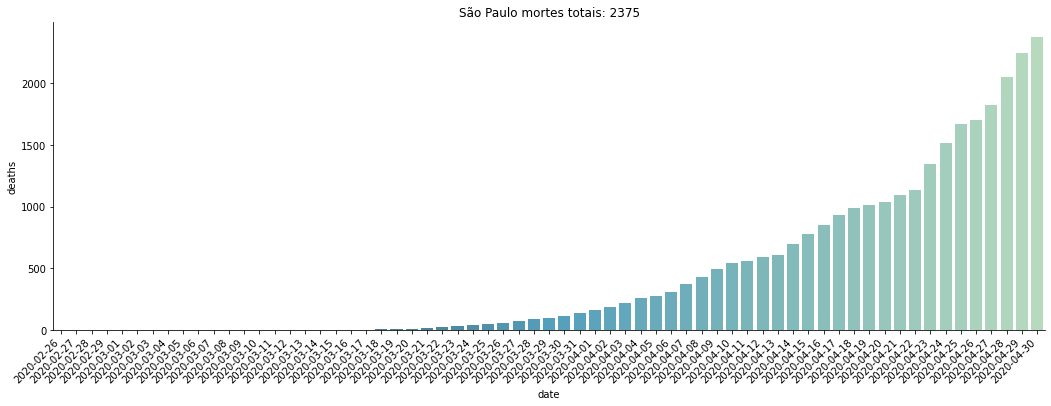

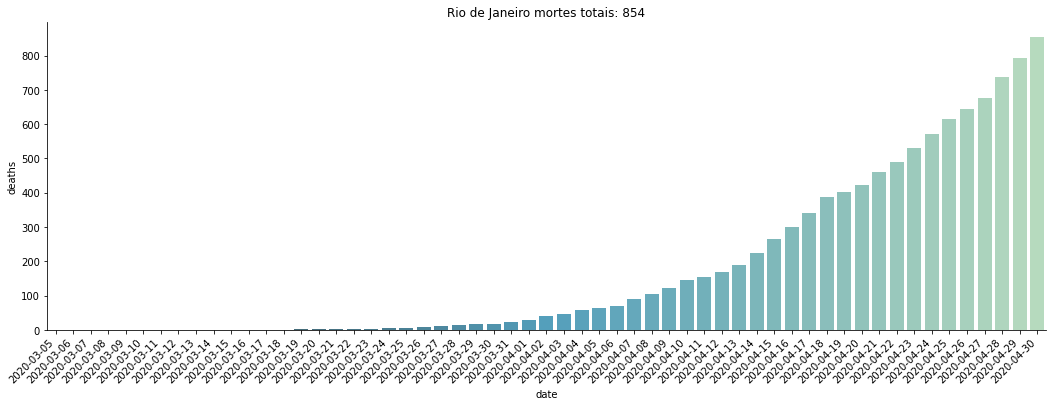

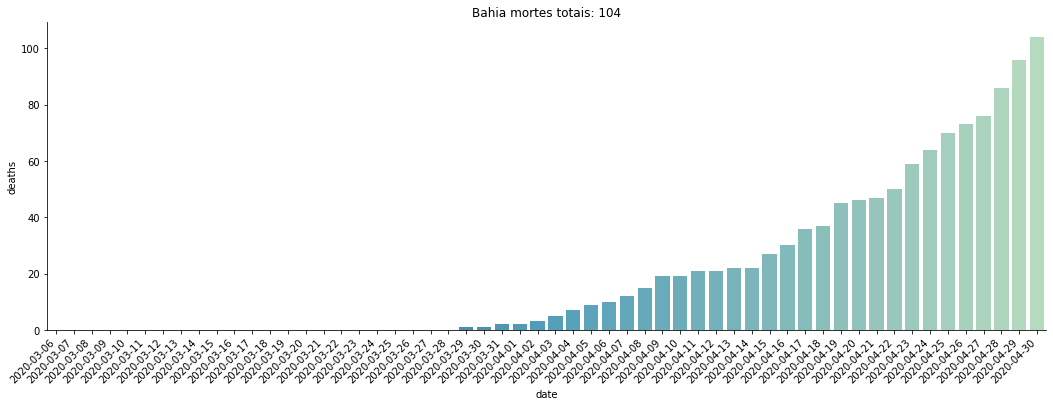

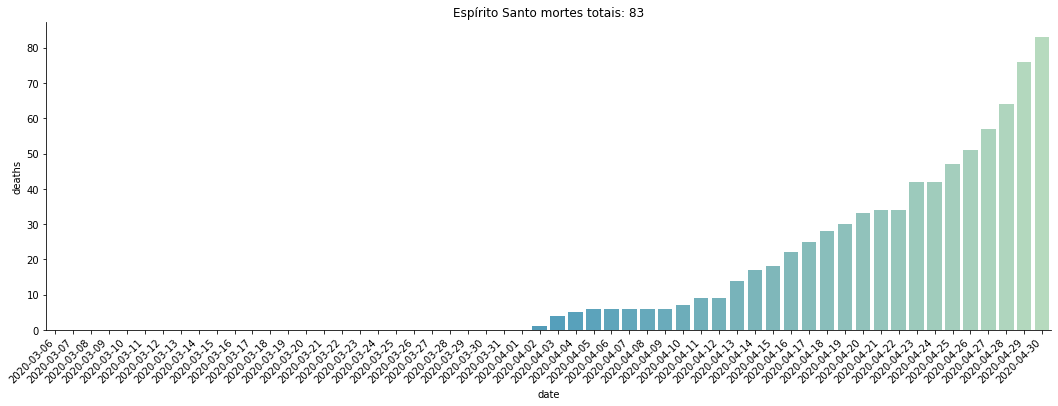

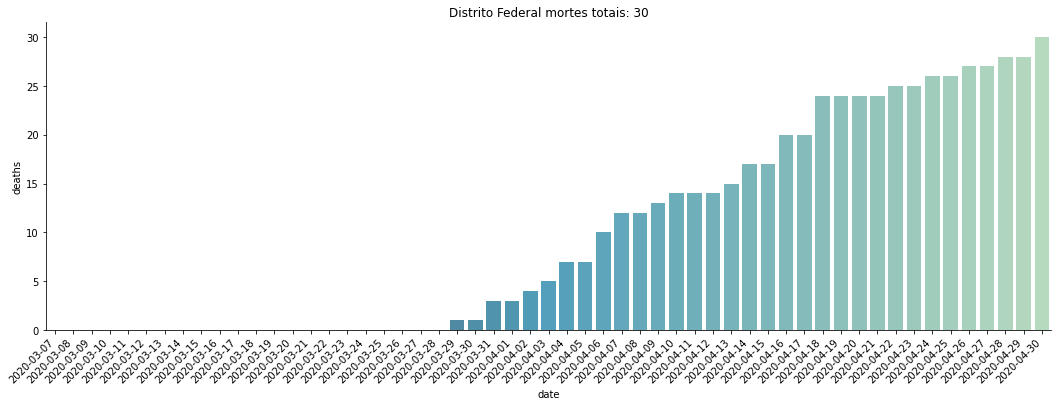

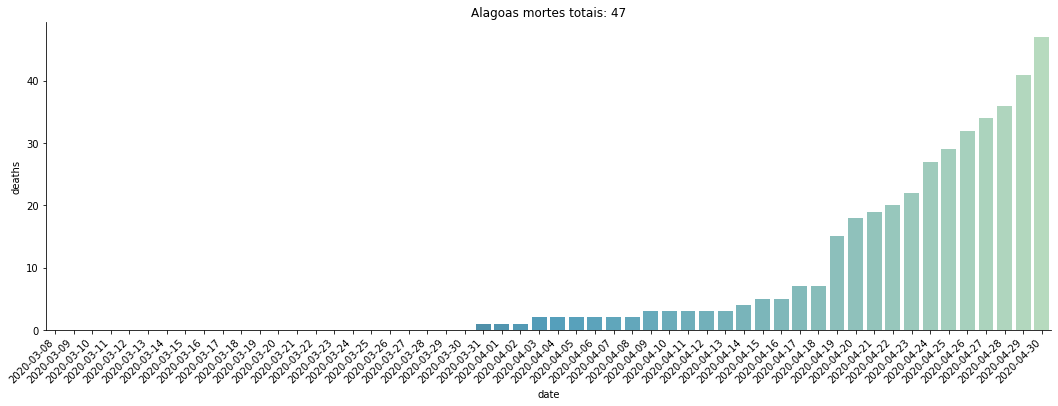

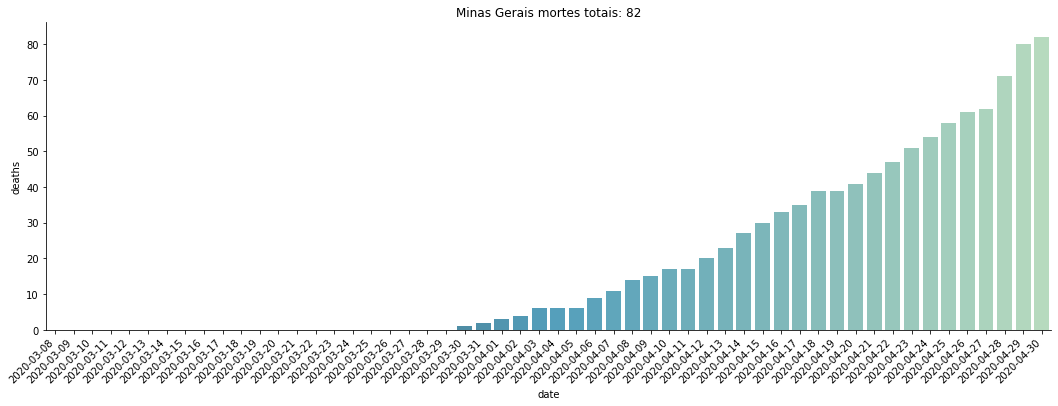

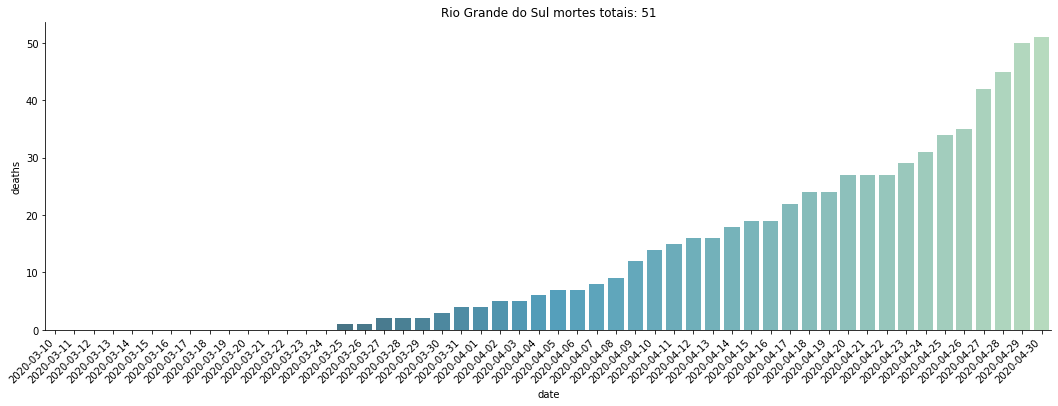

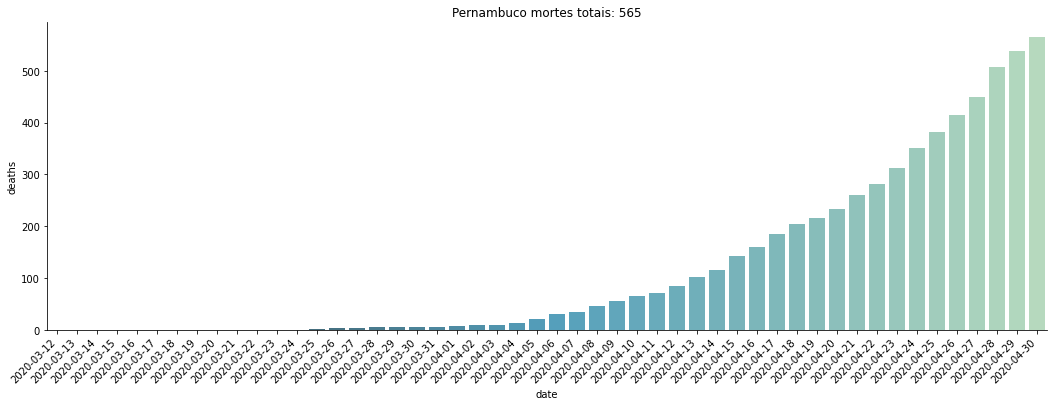

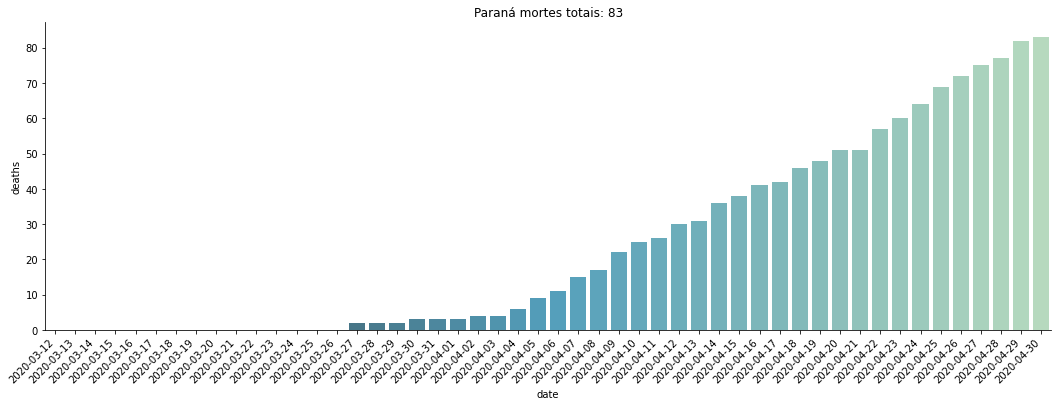

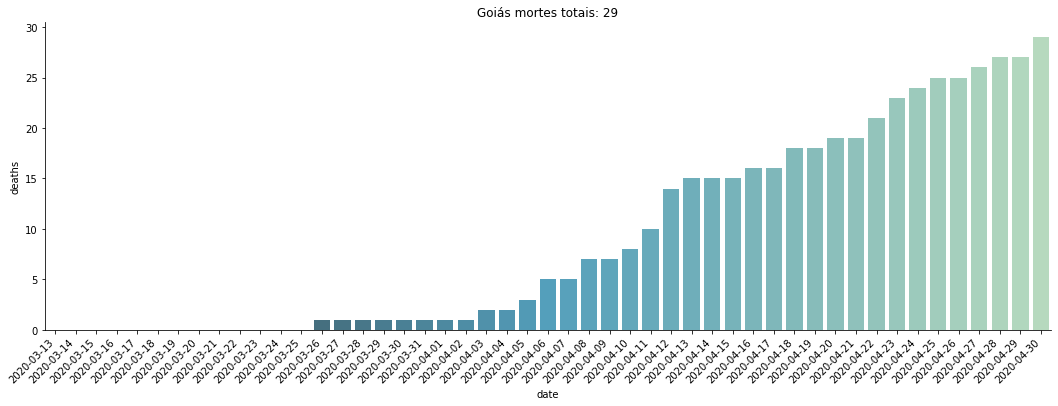

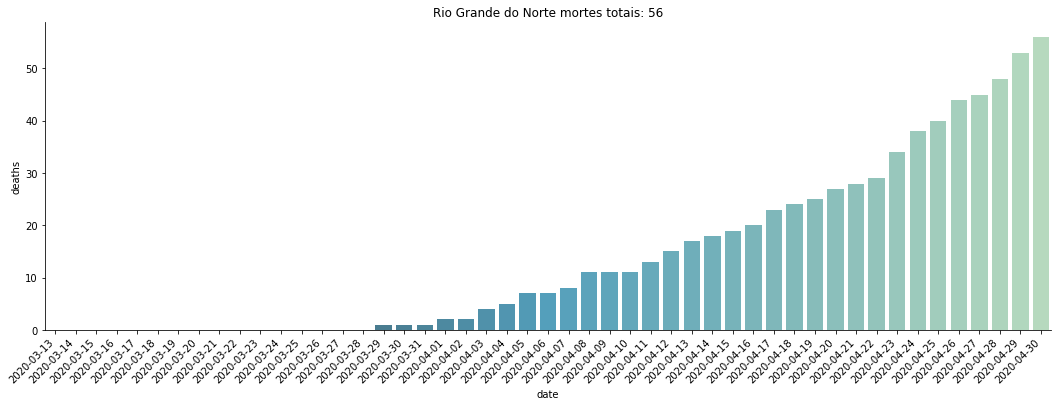

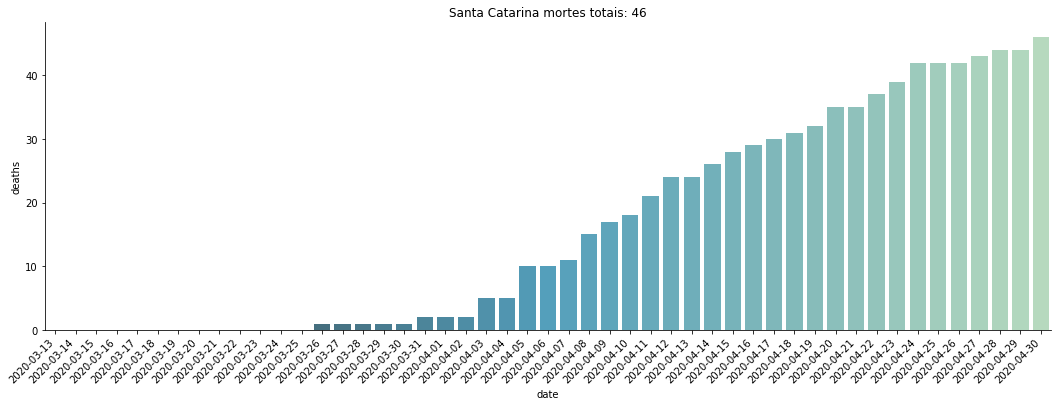

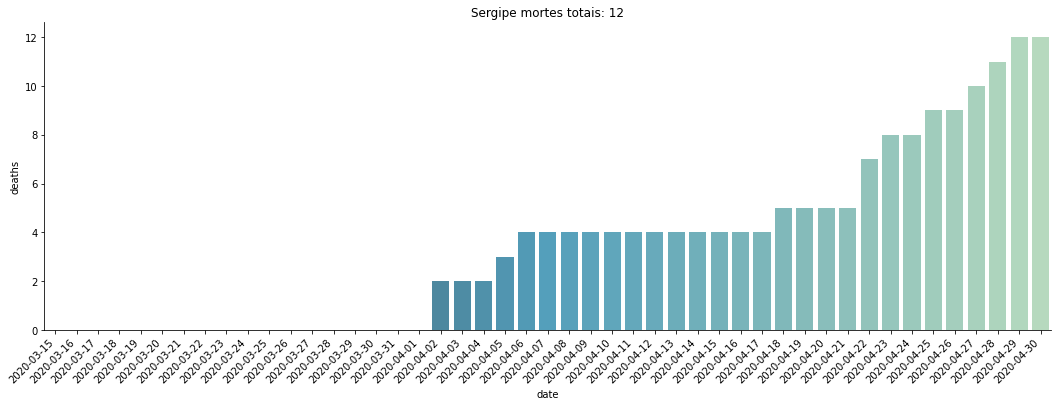

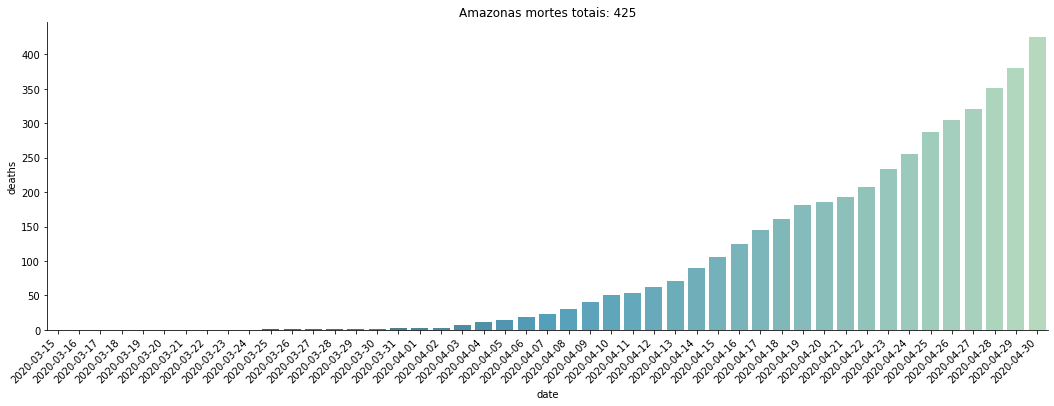

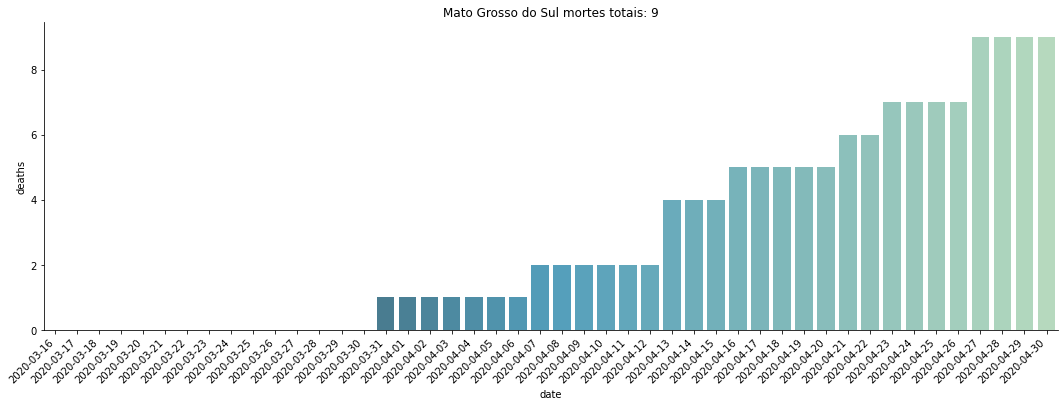

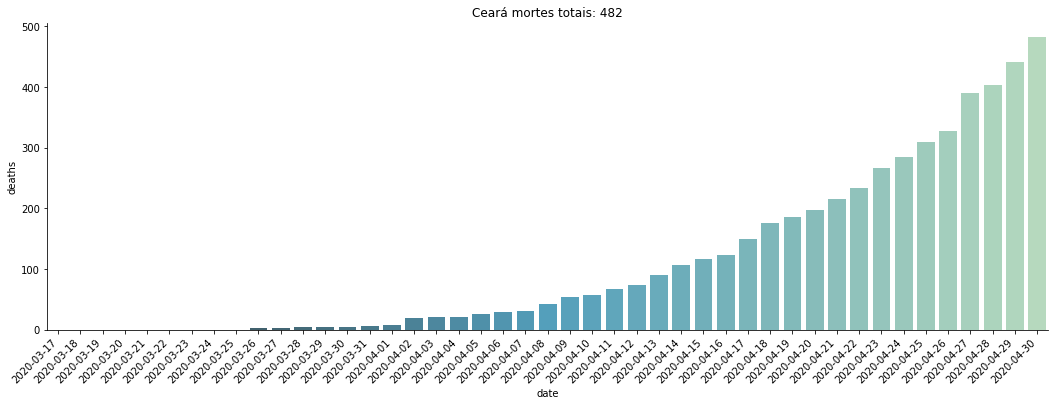

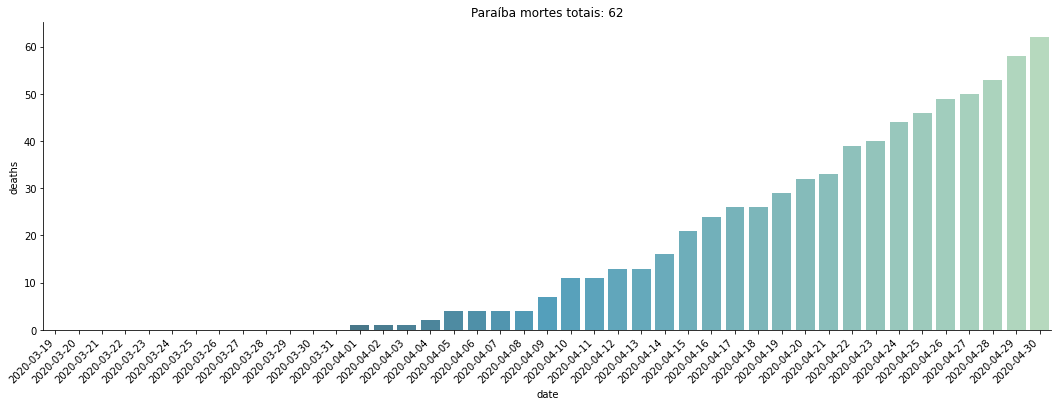

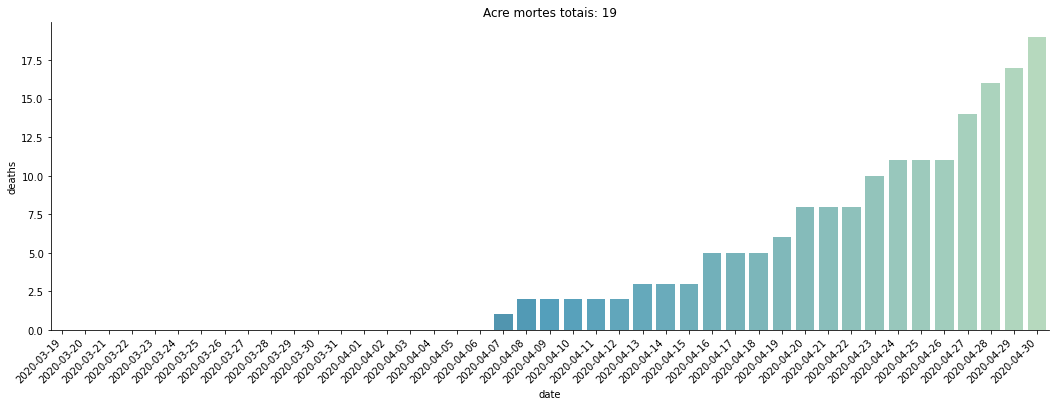

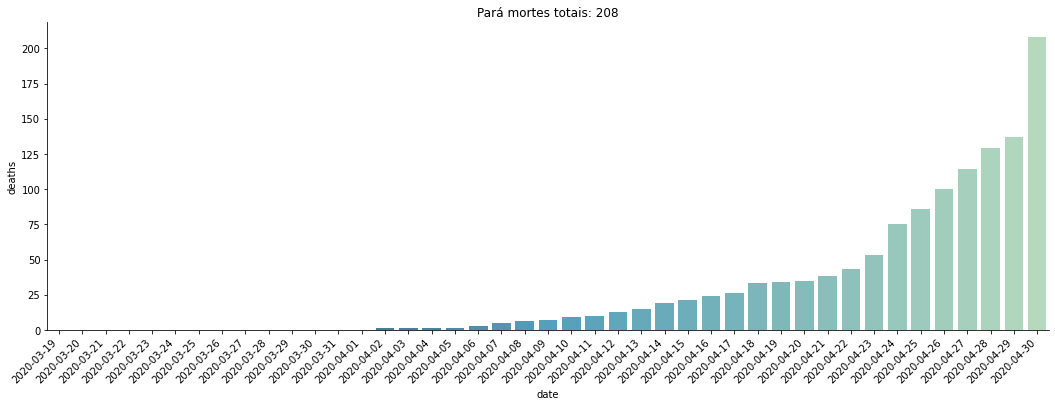

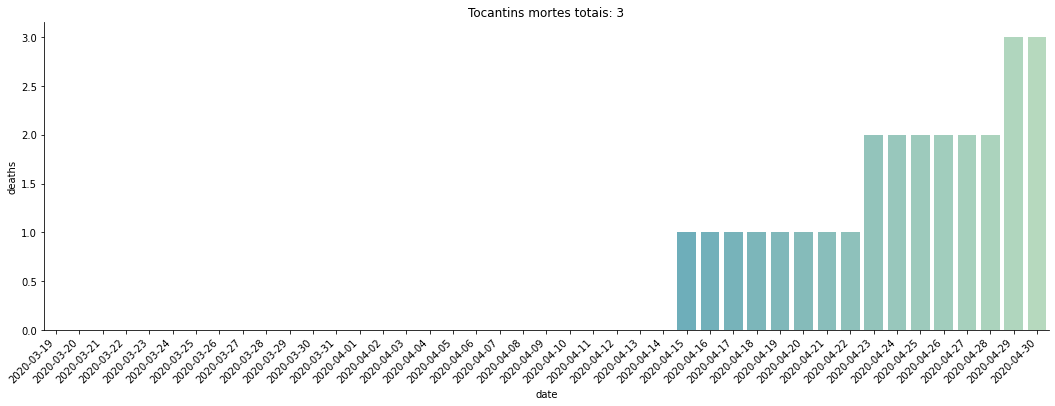

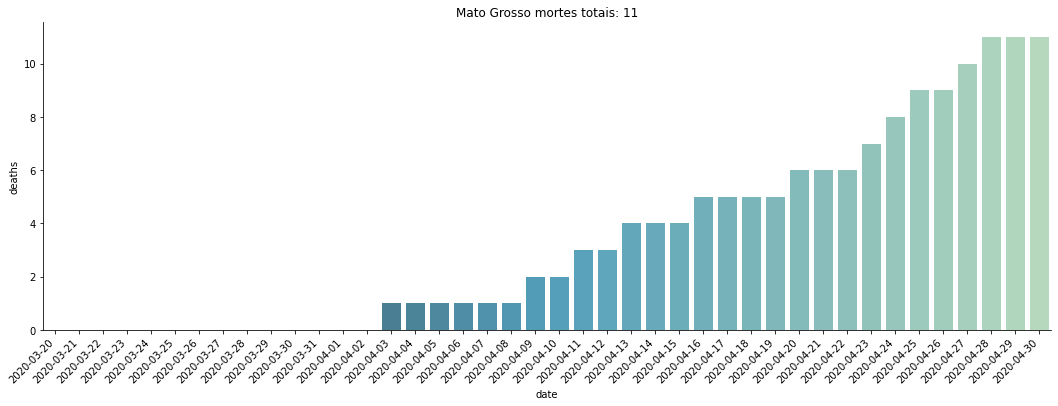

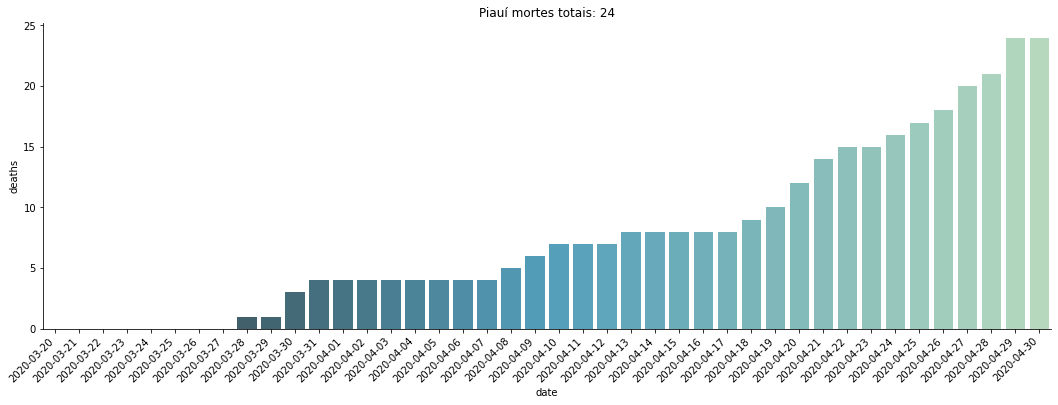

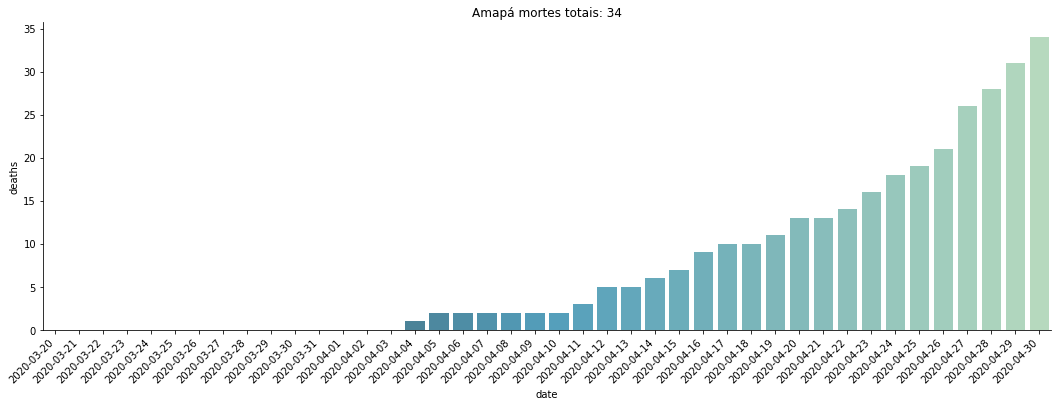

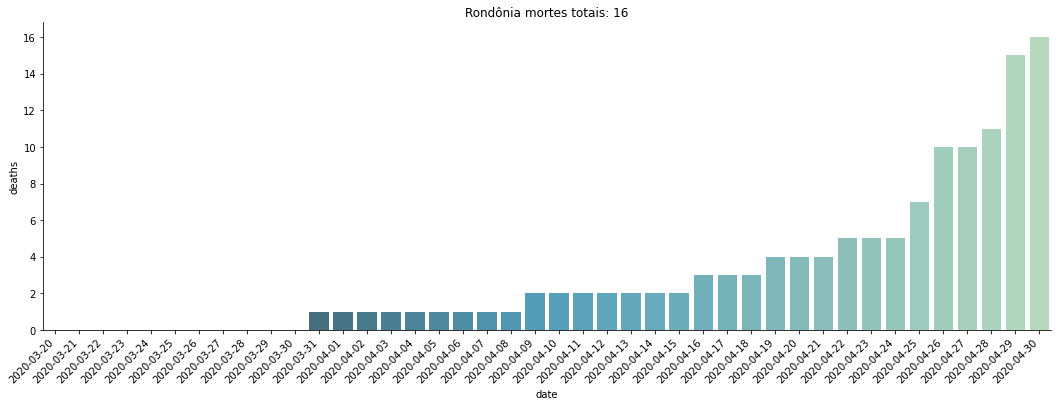

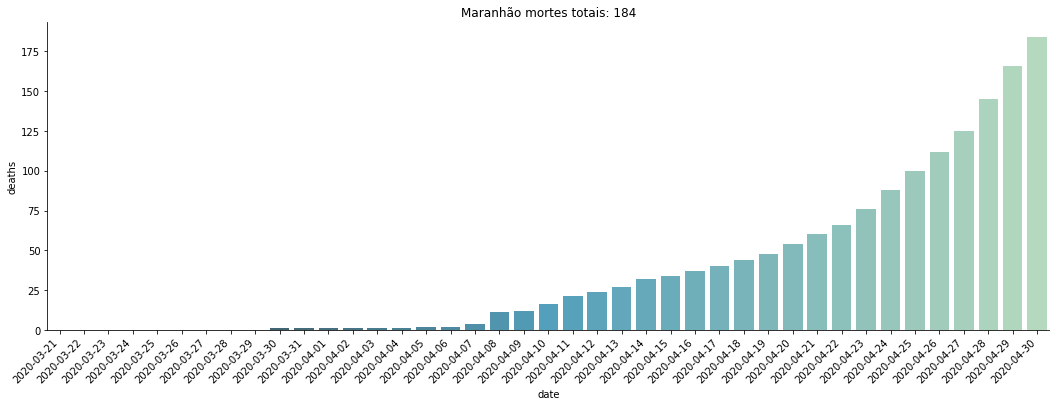

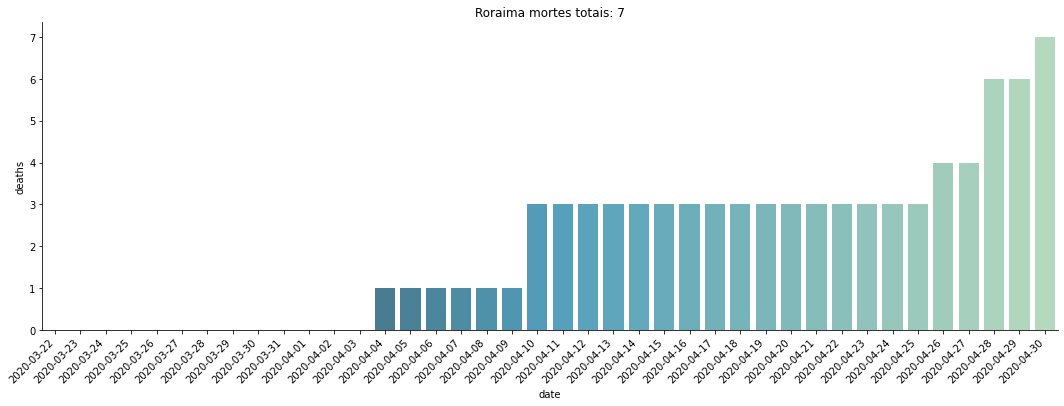

In [30]:
for i in range(len(d)):
  p = sns.catplot(x='date',y='deaths', data=dadosPorEstado[d[i]],
                  kind='bar',palette="GnBu_d",
                  aspect=3)
  for ax in p.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')
  Mortes_confirmadas = dadosPorEstado[d[i]]['deaths']
  Mortes_confirmadas.index = range(Mortes_confirmadas.shape[0])
  plt.title(d[i]+' mortes totais: '+str(Mortes_confirmadas[Mortes_confirmadas.shape[0]-1]))
  print(p)

In [31]:
d[0]
Mortes_confirmadas[Mortes_confirmadas.shape[0]-1]

7